In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

DATA = Path('.').resolve()
FIGURES = Path('.').resolve()

In [2]:
universities_df = pd.read_csv(DATA/'universities.csv')
universities_df.head()

,College.Name,State,Public.vs.Private,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


# Remove all records with missing measurements from the dataset. (2 points)

In [3]:
universities_df.dropna(inplace=True)

In [4]:
universities_df = universities_df.reset_index(drop=True)

In [5]:
universities_df.head()

,College.Name,State,Public.vs.Private,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
2,Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0
3,Huntingdon College,AL,2,608.0,520.0,127.0,26.0,47.0,538.0,126.0,8080.0,8080.0,1380.0,2540.0,100.0,500.0,1100.0,63.0,11.4,44.0
4,Talladega College,AL,2,4414.0,1500.0,335.0,30.0,60.0,908.0,119.0,5666.0,5666.0,1424.0,1540.0,418.0,1000.0,1400.0,56.0,15.5,46.0


# For all the continuous measurements, run hierarchical clustering using complete linkage and Manhattan distance. Make sure to normalize the measurements. From the dendrogram: How many clusters seem reasonable for describing these data? Do you think the analysis will change if you use Euclidean distance? (6 points)

In [6]:
universities_df_norm = universities_df.iloc[:,3:].apply(preprocessing.scale, axis=0)

In [7]:
Z = linkage(universities_df_norm, method='complete', metric='cityblock')

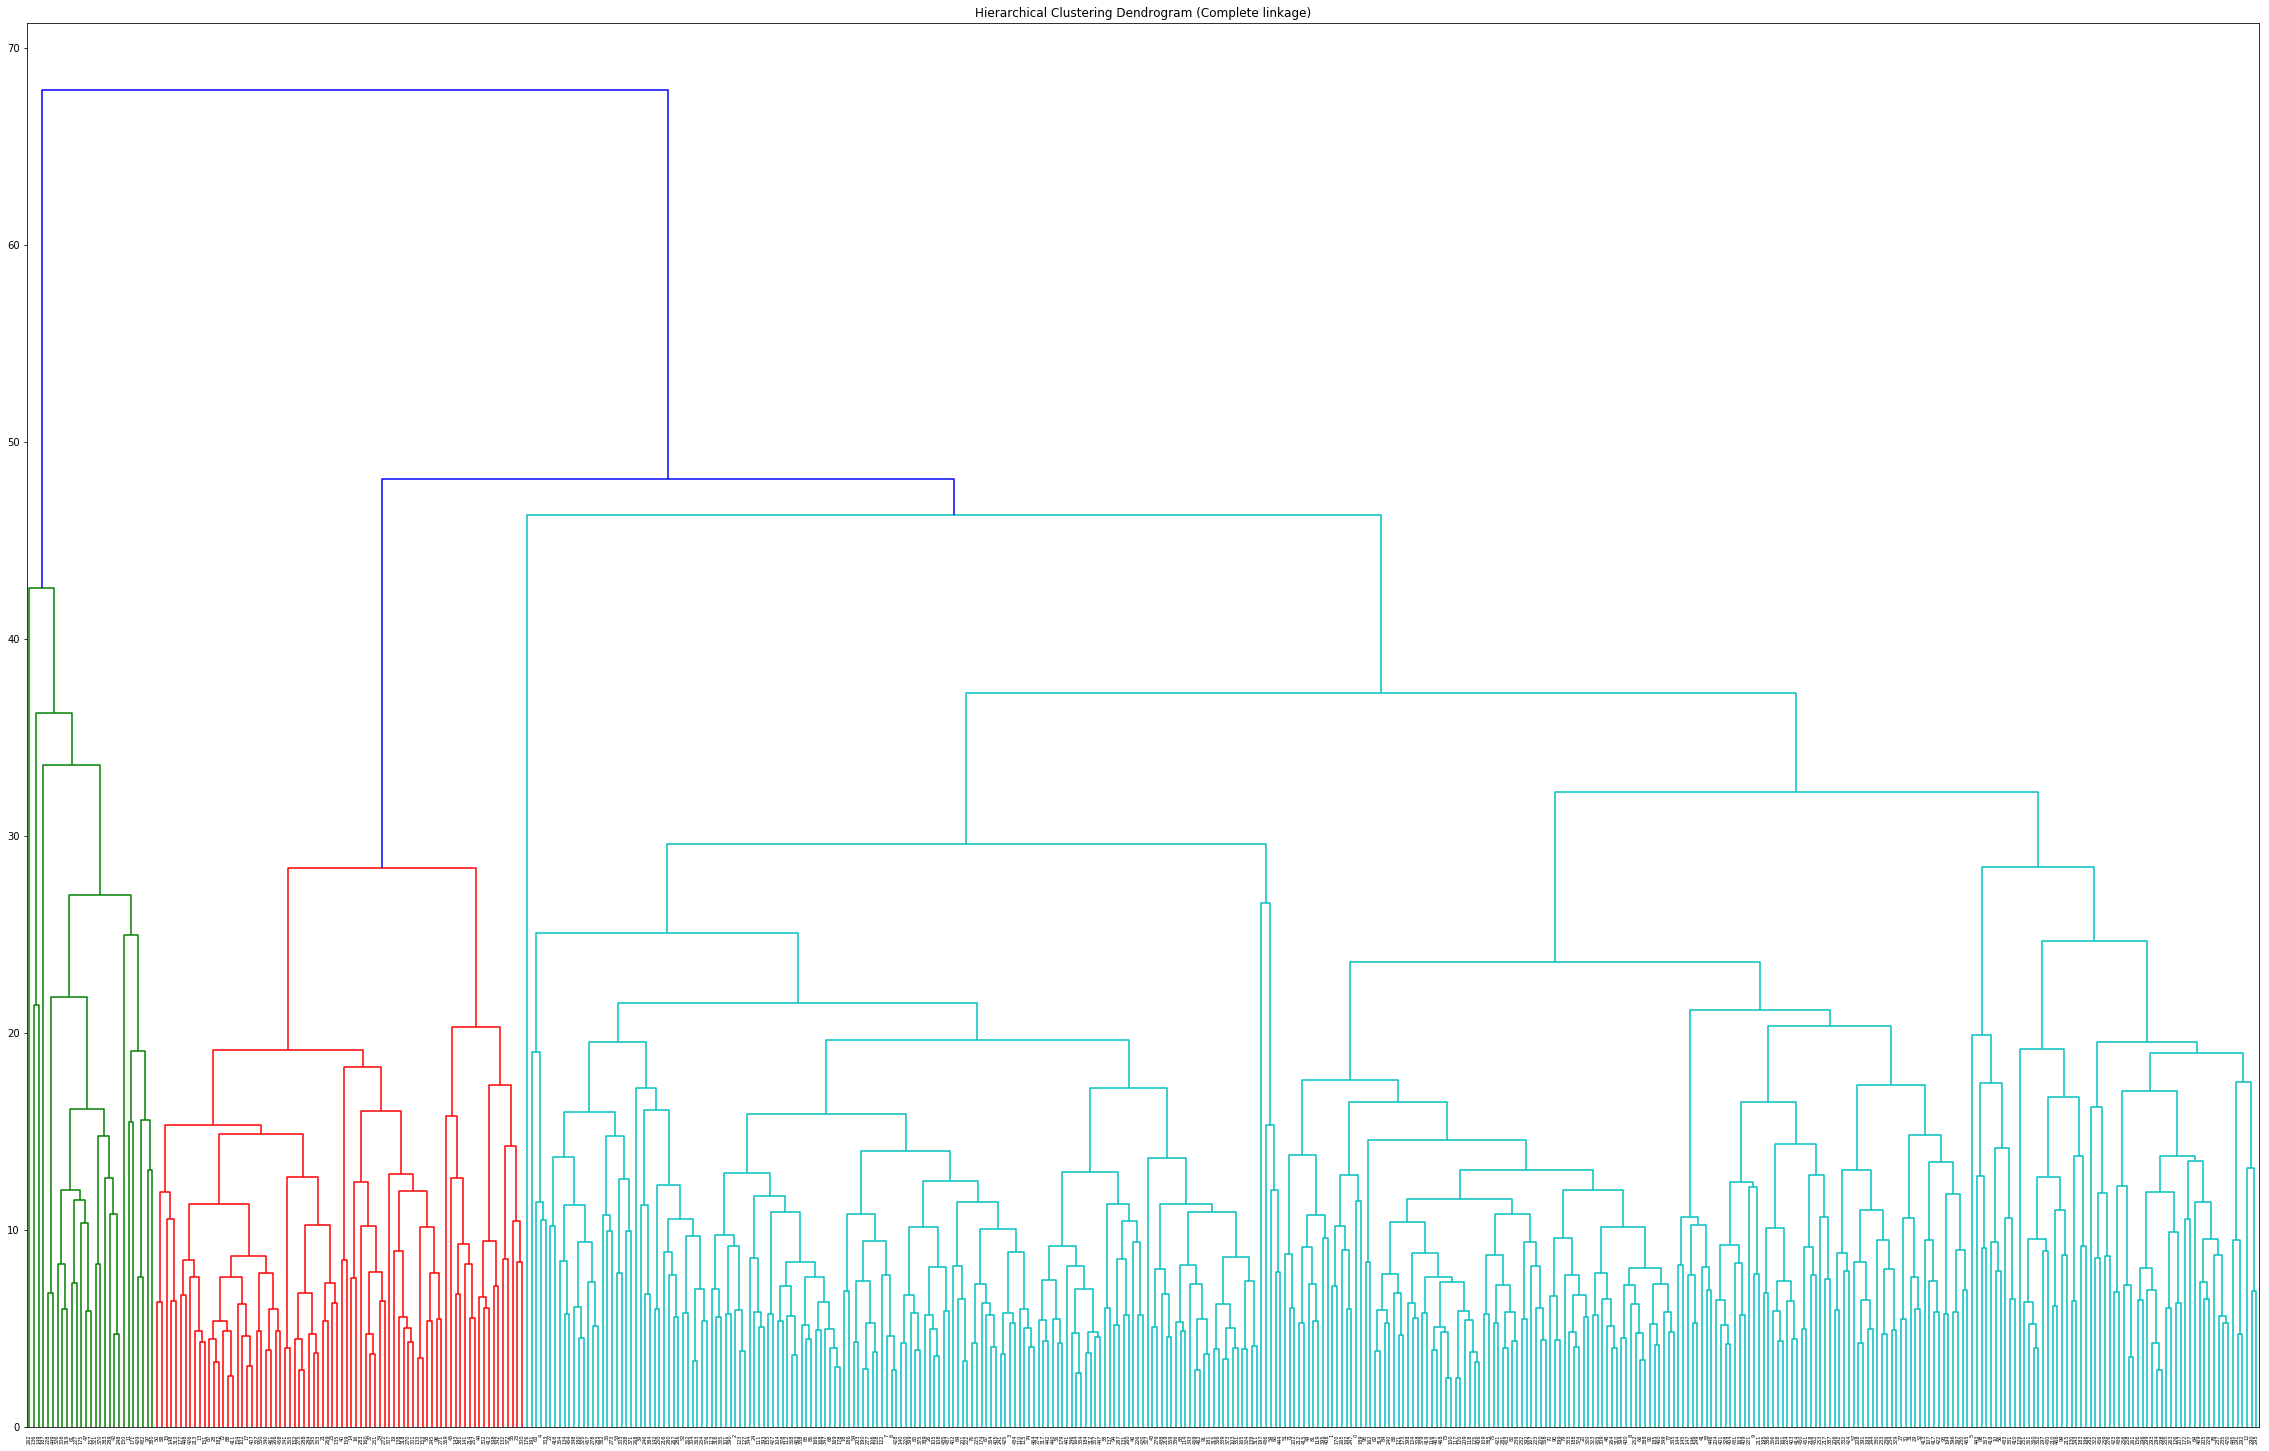

In [8]:
fig = plt.figure(figsize=(40, 30))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
dendrogram(Z, labels=universities_df_norm.index)
plt.show()

From the dendrogram, 3 clusters seem reasonable for describing these data. I think the analysis may change if using Euclidean distance

# Compare the summary statistics for each cluster and describe each cluster in this context (e.g., “Universities with high tuition, low acceptance rate…”). (5 points)

In [9]:
memb = fcluster(linkage(universities_df_norm, method='complete', metric='cityblock'), 3, criterion='maxclust')
centroids = {}
for key, item in universities_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 27
Cluster 2: size 78
Cluster 3: size 366


,No.appli.rec,No.appl.accepted,No.new.stud.enrolled,Per.new.stud.from.top.10,Per.new.stud.from.top.25,No.FT.undergrad,No.PT.undergrad,in.state.tuition,out.of.state.tuition,room,board,add.fees,estim.book.costs,estim.personal.dollar,Per.fac.wvs.PHD,stud.vs.fac.ratio,Graduation.rate
1,2.68,2.99,2.97,0.25,0.45,2.92,1.87,-1.00,-0.33,0.03,0.01,0.86,0.10,0.65,0.80,0.62,0.10
2,0.36,0.13,-0.03,1.49,1.34,-0.12,-0.37,1.48,1.62,1.04,0.98,-0.05,0.31,-0.45,1.01,-0.99,1.03
3,-0.28,-0.25,-0.21,-0.34,-0.32,-0.19,-0.06,-0.24,-0.32,-0.22,-0.21,-0.05,-0.07,0.05,-0.27,0.17,-0.23


We can see from the above clusters, when #application, enrollment, accepted, fulltime, partime are high, instate and outstate tuition are low, studentfaculty rate is high. Similarly, when appliation etc are in between, tuition fee is high and phd faculty percentage is high, student faculty ratio is low, graduation rate is high. 

# Use the categorical measurements that were not used in the analysis (State and Private/Public) to characterize the different clusters. Is there any relationship between the clusters and the categorical information. (5 points)

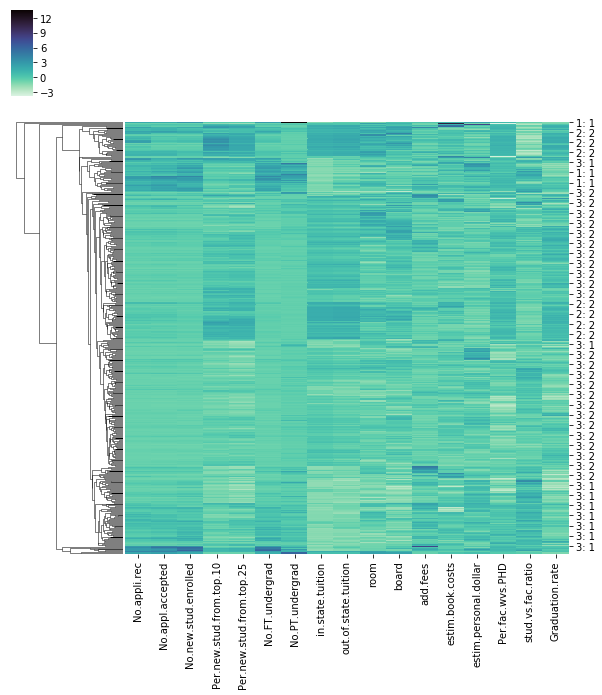

In [10]:
universities_df_norm.index = ['{}: {}'.format(cluster, schooltype) for cluster, schooltype in zip(memb, universities_df['Public.vs.Private'])]
sns.clustermap(universities_df_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

From the above plot to compare cluster and school type(public vs. private), we can see the cluster with high tuition, high phd faculty ratio, low student faculty ration and high graduation rate matching with private school.

# What other external information can explain the contents of some or all of these clusters? (2 points)

university ranking, student gpa etc can also explain the contents of the clusters.